In [1]:
import os
import sys

seed = 0
os.environ['PYTHONHASSEED'] = str(seed)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

from tensorflow.random import set_seed

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import load_model

In [3]:
# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from src.data_reader import DataReader
from src.dataset_exploration import unit_cycle_info
from src.metrics import compute_evaluation_metrics
from src.model_evaluation import evaluate_mlp, evaluate_mlp_multiple_splits
from src.plotting import plot_loss_curves, plot_rul, plot_rul_confidence_interval
from src.save_object import load_object

In [5]:
# Set seed
random.seed(seed)
np.random.seed(seed)
set_seed(seed)

In [6]:
# Set input and output paths
filename = r'../data/N-CMAPSS_DS02-006.h5'
output_path = r'../results/feature_subsets'

if not os.path.exists(output_path):
    os.makedirs(output_path)

In [7]:
data_reader = DataReader()

start_time = time.process_time()  
data_reader.load_dataset(filename, load_train=True, load_test=True)
print("Operation time (sec): " , (time.process_time() - start_time))

if data_reader.train_set is not None:
    print("Train set shape: " + str(data_reader.train_set.shape))
    
if data_reader.test_set is not None:   
    print("Test set shape: " + str(data_reader.test_set.shape))

Operation time (sec):  3.578125
Train set shape: (5263447, 47)
Test set shape: (1253743, 47)


In [8]:
FS1 = ['T24', 'T30', 'P15', 'SmFan', 'SmLPC']
FS2 = data_reader.column_names.w_cols + data_reader.column_names.x_s_cols + data_reader.column_names.x_v_cols
FS3 = data_reader.column_names.w_cols + data_reader.column_names.x_s_cols
FS4 = FS2 + ['HPT_flow_mod', 'LPT_flow_mod', 'LPT_eff_mod']

In [9]:
train_set = data_reader.train_set
test_set = data_reader.test_set

In [10]:
y_test = test_set['RUL']
x_test = test_set.drop(['RUL'], axis=1)

x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
NUM_TRIALS = 3
TRAIN_RESULTS_PATH = r'../results/feature_subsets/FS1'

x_test_fs = x_test[FS1]
results = evaluate_mlp_multiple_splits(x_test_fs, y_test, NUM_TRIALS, TRAIN_RESULTS_PATH, plot_loss=True)

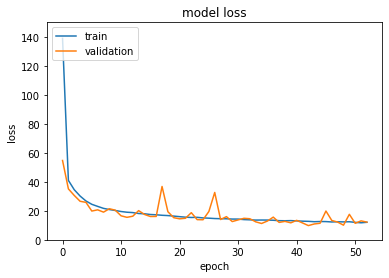

Test set:
MSE: 49.07
RMSE: 7.01
CMAPSS score: 1.67



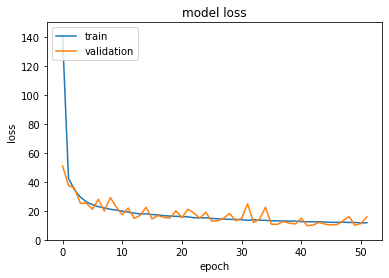

Test set:
MSE: 47.81
RMSE: 6.91
CMAPSS score: 1.64



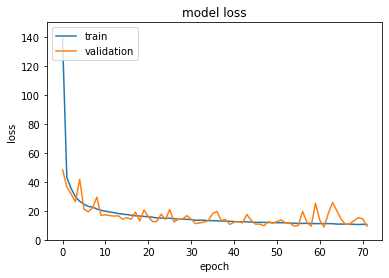

Test set:
MSE: 44.60
RMSE: 6.68
CMAPSS score: 1.62

MSE: mean = 47.16   stddev = 1.88
RMSE: mean = 6.87   stddev = 0.14
CMAPSS: mean = 1.64   stddev = 0.02


In [17]:
NUM_TRIALS = 3
TRAIN_RESULTS_PATH = r'../results/feature_subsets/FS2'

x_test_fs = x_test[FS2]
results = evaluate_mlp_multiple_splits(x_test_fs, y_test, NUM_TRIALS, TRAIN_RESULTS_PATH, plot_loss=True)

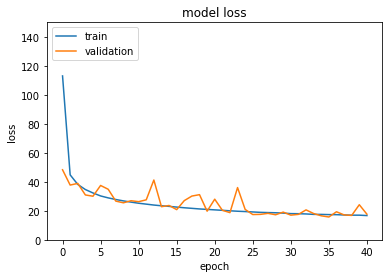

Test set:
MSE: 68.15
RMSE: 8.26
CMAPSS score: 1.84



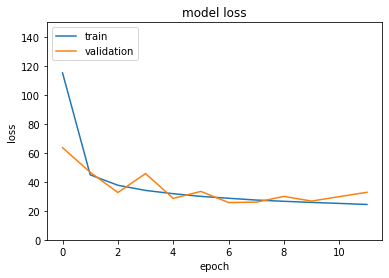

Test set:
MSE: 57.54
RMSE: 7.59
CMAPSS score: 1.74



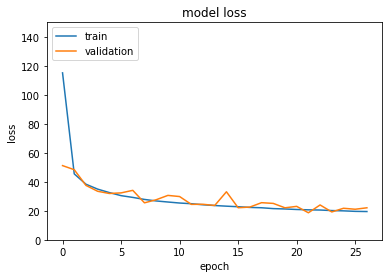

Test set:
MSE: 69.95
RMSE: 8.36
CMAPSS score: 1.85

MSE: mean = 65.21   stddev = 5.47
RMSE: mean = 8.07   stddev = 0.34
CMAPSS: mean = 1.81   stddev = 0.05


In [19]:
NUM_TRIALS = 3
TRAIN_RESULTS_PATH = r'../results/feature_subsets/FS3'

x_test_fs = x_test[FS3]
results = evaluate_mlp_multiple_splits(x_test_fs, y_test, NUM_TRIALS, TRAIN_RESULTS_PATH, plot_loss=True)

In [11]:
y_train = train_set['RUL']
x_train = train_set.drop(['RUL'], axis=1)

x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)

Saved object to file: ../results/feature_subsets\FS1\split_0\scaler.pkl
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 231,809
Trainable params: 231,809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
9249/9253 [======================

Epoch 28/60
9247/9253 [============================>.] - ETA: 0s - loss: 38.2587
Epoch 00028: val_loss did not improve from 36.48779
9253/9253 [==============================] - 37s 4ms/step - loss: 38.2559 - val_loss: 41.6697
Epoch 29/60
9243/9253 [============================>.] - ETA: 0s - loss: 37.8695
Epoch 00029: val_loss did not improve from 36.48779
9253/9253 [==============================] - 37s 4ms/step - loss: 37.8693 - val_loss: 38.5000
Epoch 30/60
9251/9253 [============================>.] - ETA: 0s - loss: 37.6351
Epoch 00030: val_loss did not improve from 36.48779
9253/9253 [==============================] - 37s 4ms/step - loss: 37.6362 - val_loss: 40.6692
Epoch 31/60
9243/9253 [============================>.] - ETA: 0s - loss: 37.4764
Epoch 00031: val_loss improved from 36.48779 to 35.47985, saving model to ../results/feature_subsets\FS1\split_0\mlp_model_trained.h5
9253/9253 [==============================] - 37s 4ms/step - loss: 37.4777 - val_loss: 35.4799
Epoch 32/6

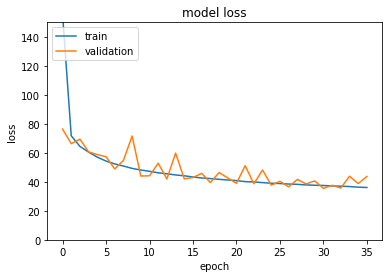

Saved object to file: ../results/feature_subsets\FS1\split_0\history_0.pkl
Test set:
MSE: 61.66
RMSE: 7.85
CMAPSS score: 1.80

Saved object to file: ../results/feature_subsets\FS1\split_1\scaler.pkl
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               1536      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 231,809
Trainable params: 231,809
Non-t

In [ ]:
# Train single MLP
from src.training import MLPConfigParams, train_evaluate_mlp

EPOCHS = 60
BATCH_SIZE = 512
NUM_TRIALS = 3
mlp_config_params = MLPConfigParams(layer_sizes=[256, 256, 512, 64], activation='tanh', dropout=0.0)

results_path = os.path.join(output_path, f"FS1")
if not os.path.exists(results_path):
    os.makedirs(results_path)
    
x_train_fs = x_train[FS1]
x_test_fs = x_test[FS1]

train_evaluate_mlp(
        x_train_fs, y_train, 
        x_test_fs, y_test,
        NUM_TRIALS,
        mlp_config_params, 
        results_path, 
        EPOCHS, BATCH_SIZE)

In [ ]:
# Train single MLP
EPOCHS = 60
BATCH_SIZE = 512
NUM_TRIALS = 3
mlp_config_params = MLPConfigParams(layer_sizes=[256, 256, 512, 64], activation='tanh', dropout=0.0)

results_path = os.path.join(output_path, f"FS4")
if not os.path.exists(results_path):
    os.makedirs(results_path)
    
x_train_fs = x_train[FS4]
x_test_fs = x_test[FS4]

train_evaluate_mlp(
        x_train_fs, y_train, 
        x_test_fs, y_test,
        NUM_TRIALS,
        mlp_config_params, 
        results_path, 
        EPOCHS, BATCH_SIZE)

In [ ]:
# Train single MLP
EPOCHS = 60
BATCH_SIZE = 512
NUM_TRIALS = 3
mlp_config_params = MLPConfigParams(layer_sizes=[256, 256, 512, 64], activation='tanh', dropout=0.0)

results_path = os.path.join(output_path, f"FS2")
if not os.path.exists(results_path):
    os.makedirs(results_path)
    
x_train_fs = x_train[FS2]
x_test_fs = x_test[FS2]

train_evaluate_mlp(
        x_train_fs, y_train, 
        x_test_fs, y_test,
        NUM_TRIALS,
        mlp_config_params, 
        results_path, 
        EPOCHS, BATCH_SIZE)